<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#eca912;
            overflow:hidden;
            font-weight:500">Loan Approval Prediction Problem </div>


<div style="padding:20px; 
            color: #4b0082;
            margin:10px;
            font-size:110%;
            text-align:right;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #ff7f50;
            background-color:#ffd700;
            overflow:hidden;
            font-weight:500">
                Problem Statement: Loan Approval Prediction Problem
Type: Binary Classification Loan approval prediction is classic problem to learn and apply lots of data analysis techniques to create best Classification model.
Given with the dataset consisting of details of applicants for loan and status whether the loan application is approved or not. Basis on the a binary classification model is to be created 
with maximum accuracy.</div>

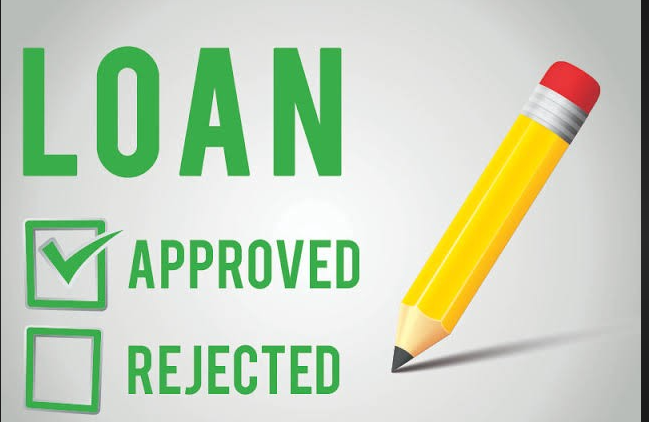

In [95]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [96]:
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.0,
             )

import matplotlib
matplotlib.rcParams.update({'font.size': 10})
plt.style.use('dark_background')

In [97]:
data = pd.read_csv("loan_prediction.csv")


In [98]:
data.sample(5).style.set_properties(
    **{
        'background-color': 'orange',
        'color': 'white',
           })

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
209,LP001702,Male,No,0,Graduate,No,3418,0.000000,127.000000,360.000000,1.000000,Semiurban,N
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.000000,161.000000,360.000000,0.000000,Semiurban,Y
445,LP002429,Male,Yes,1,Graduate,Yes,3466,1210.000000,130.000000,360.000000,1.000000,Rural,Y
190,LP001653,Male,No,0,Not Graduate,No,4885,0.000000,48.000000,360.000000,1.000000,Rural,Y
150,LP001528,Male,No,0,Graduate,No,6277,0.000000,118.000000,360.000000,0.000000,Rural,N


In [99]:
data.shape

(614, 13)

In [100]:
data.describe().style.background_gradient(cmap='rainbow')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.000000,564.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,85.587325,65.120410,0.364878
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [101]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

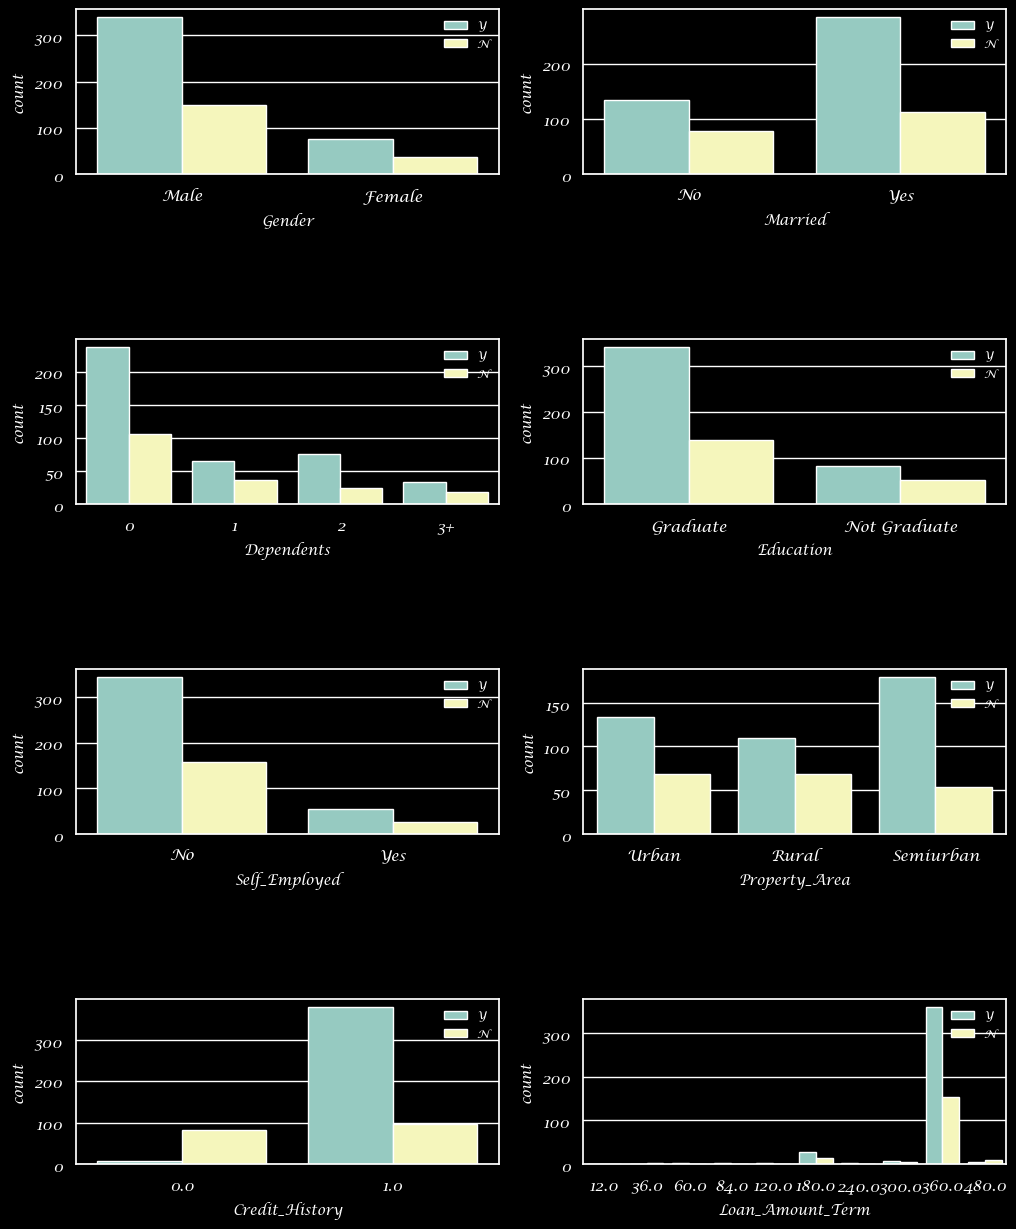

In [102]:

fig, axes = plt.subplots(4, 2, figsize=(12, 15))

for idx, cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=data, hue='Loan_Status', ax=axes[row, col])
    axes[row, col].legend(fontsize='small')  # Set the fontsize for the legend

plt.subplots_adjust(hspace=1)
plt.show()


In [103]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


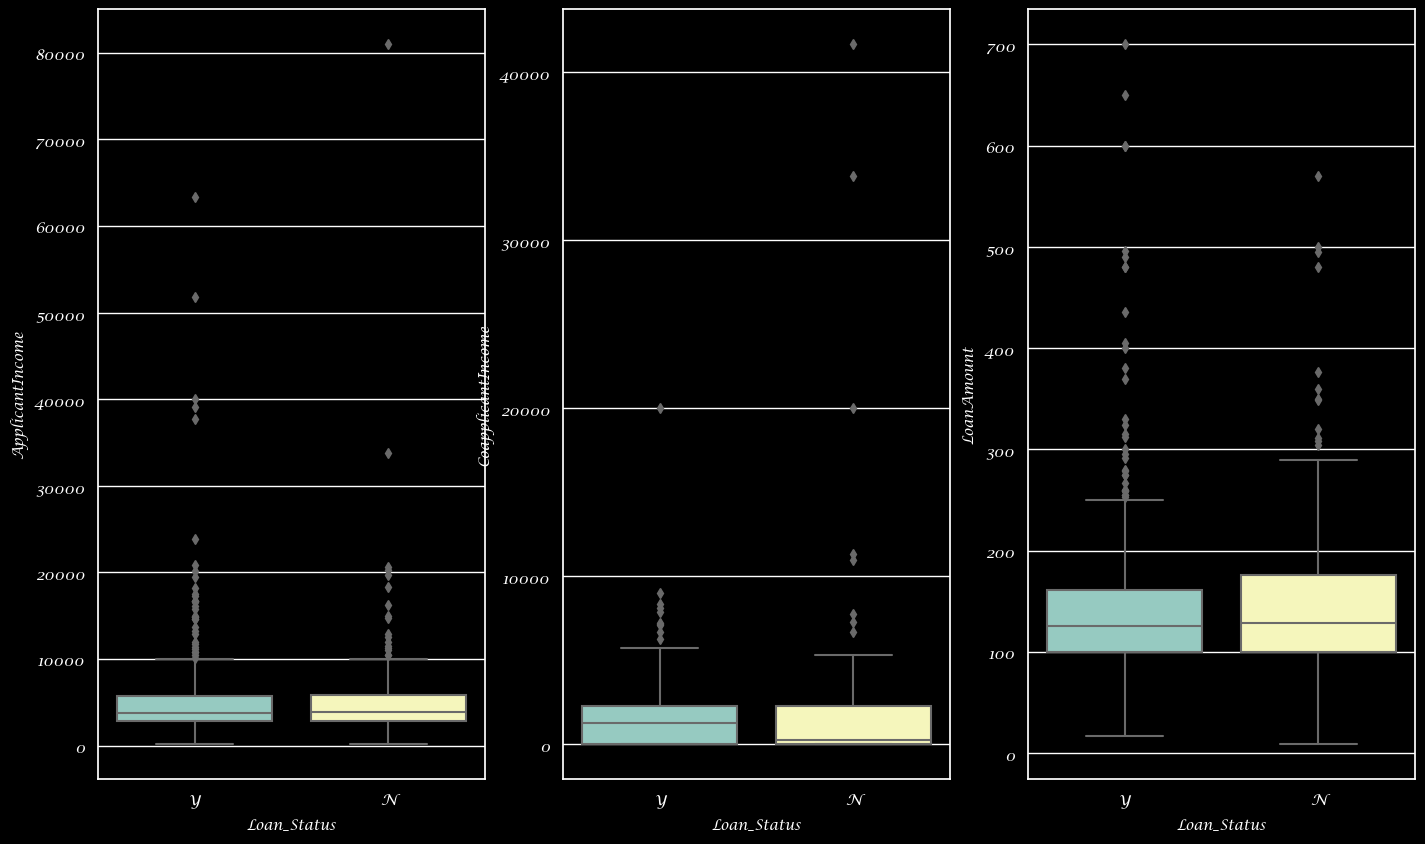

In [104]:
fig,axes = plt.subplots(1,3,figsize=(17,10))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numercical Columns, there is no significant relation to Loan approval status.

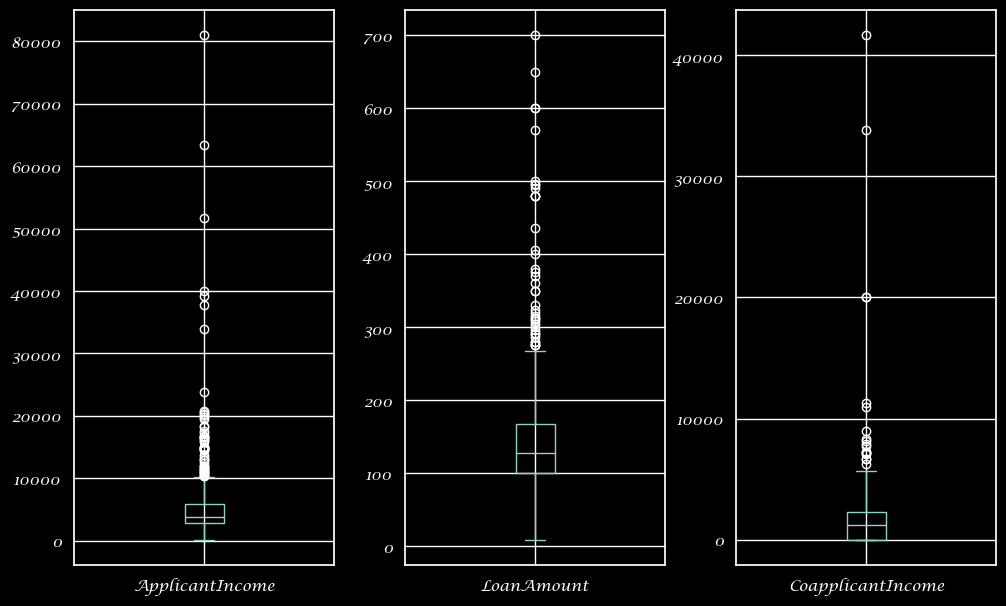

In [105]:
plt.subplot(131)
data['ApplicantIncome'].plot.box(figsize=(10,6))
plt.tight_layout(pad=0.5)
plt.subplot(132)
data['LoanAmount'].plot.box()
plt.tight_layout(pad=0.5)
plt.subplot(133)
data['CoapplicantIncome'].plot.box()
plt.tight_layout(pad=0.5)

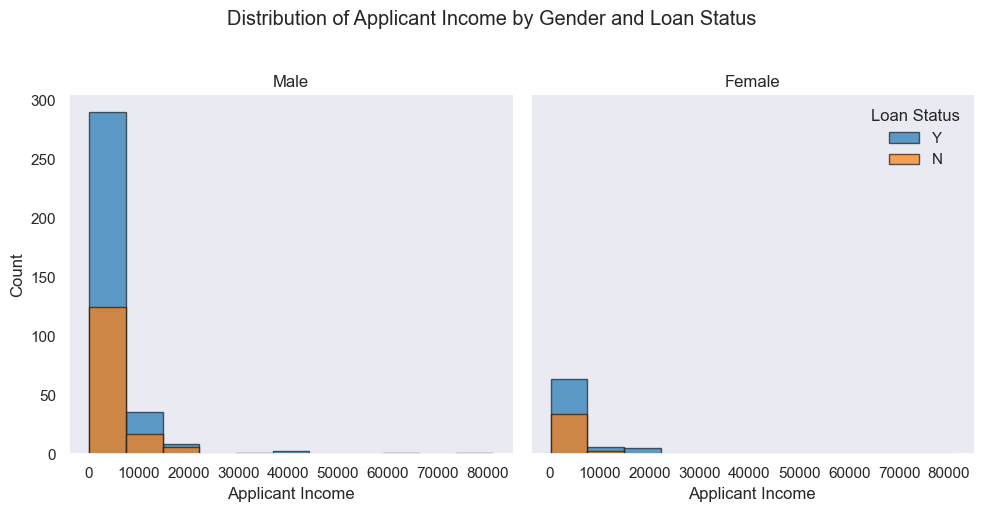

In [106]:
custom_palette = sns.color_palette("tab10", 2)
bins = np.linspace(data['ApplicantIncome'].min(), data['ApplicantIncome'].max(), 12)
sns.set(style="dark")
graph = sns.FacetGrid(data, col="Gender", hue="Loan_Status", palette=custom_palette, col_wrap=2, height=5)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k", alpha=0.7)
graph.set_titles(col_template="{col_name}")
graph.axes[-1].legend(title='Loan Status', loc='upper right')
graph.set_axis_labels("Applicant Income", "Count")
graph.fig.suptitle("Distribution of Applicant Income by Gender and Loan Status", y=1.02)
plt.tight_layout()
plt.show()

In [107]:
correlation_mat = data.corr()

<Axes: >

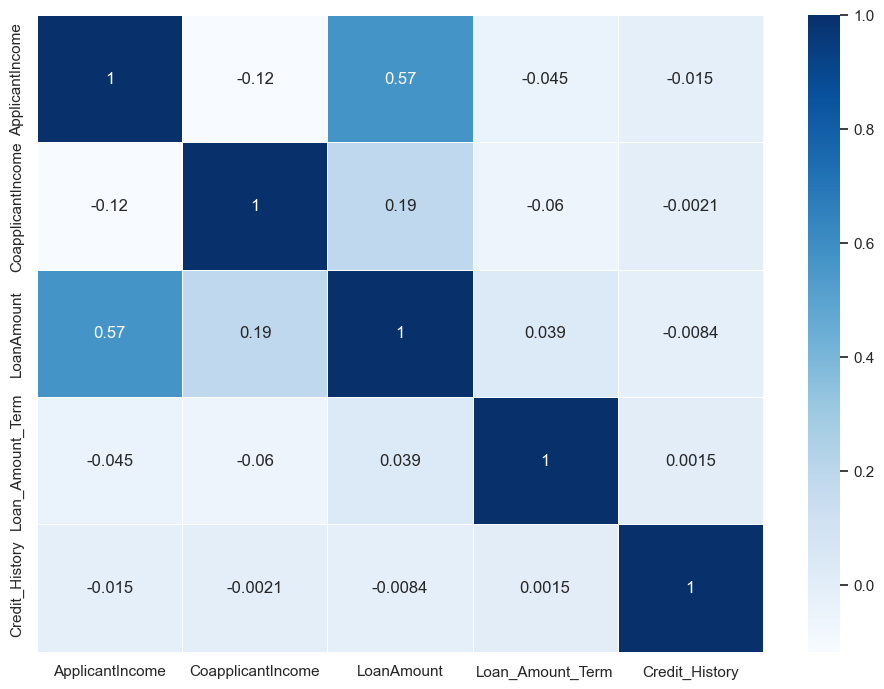

In [108]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="Blues")


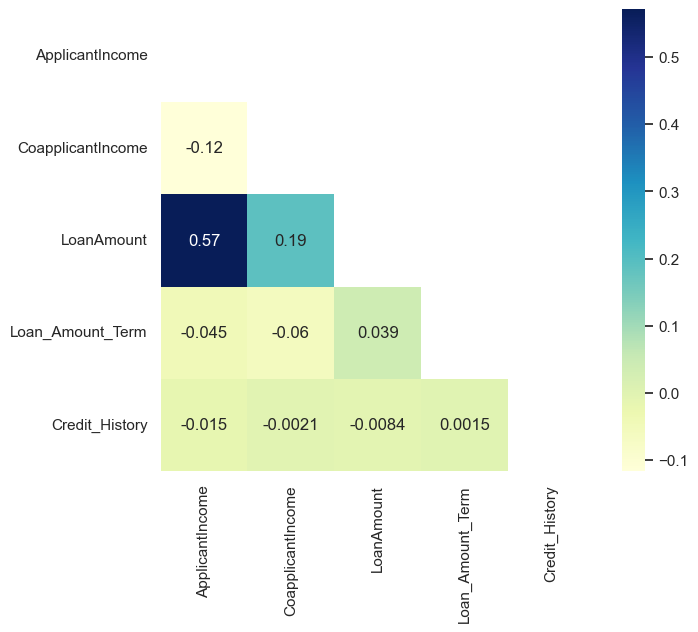

In [109]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

### There is a positive correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

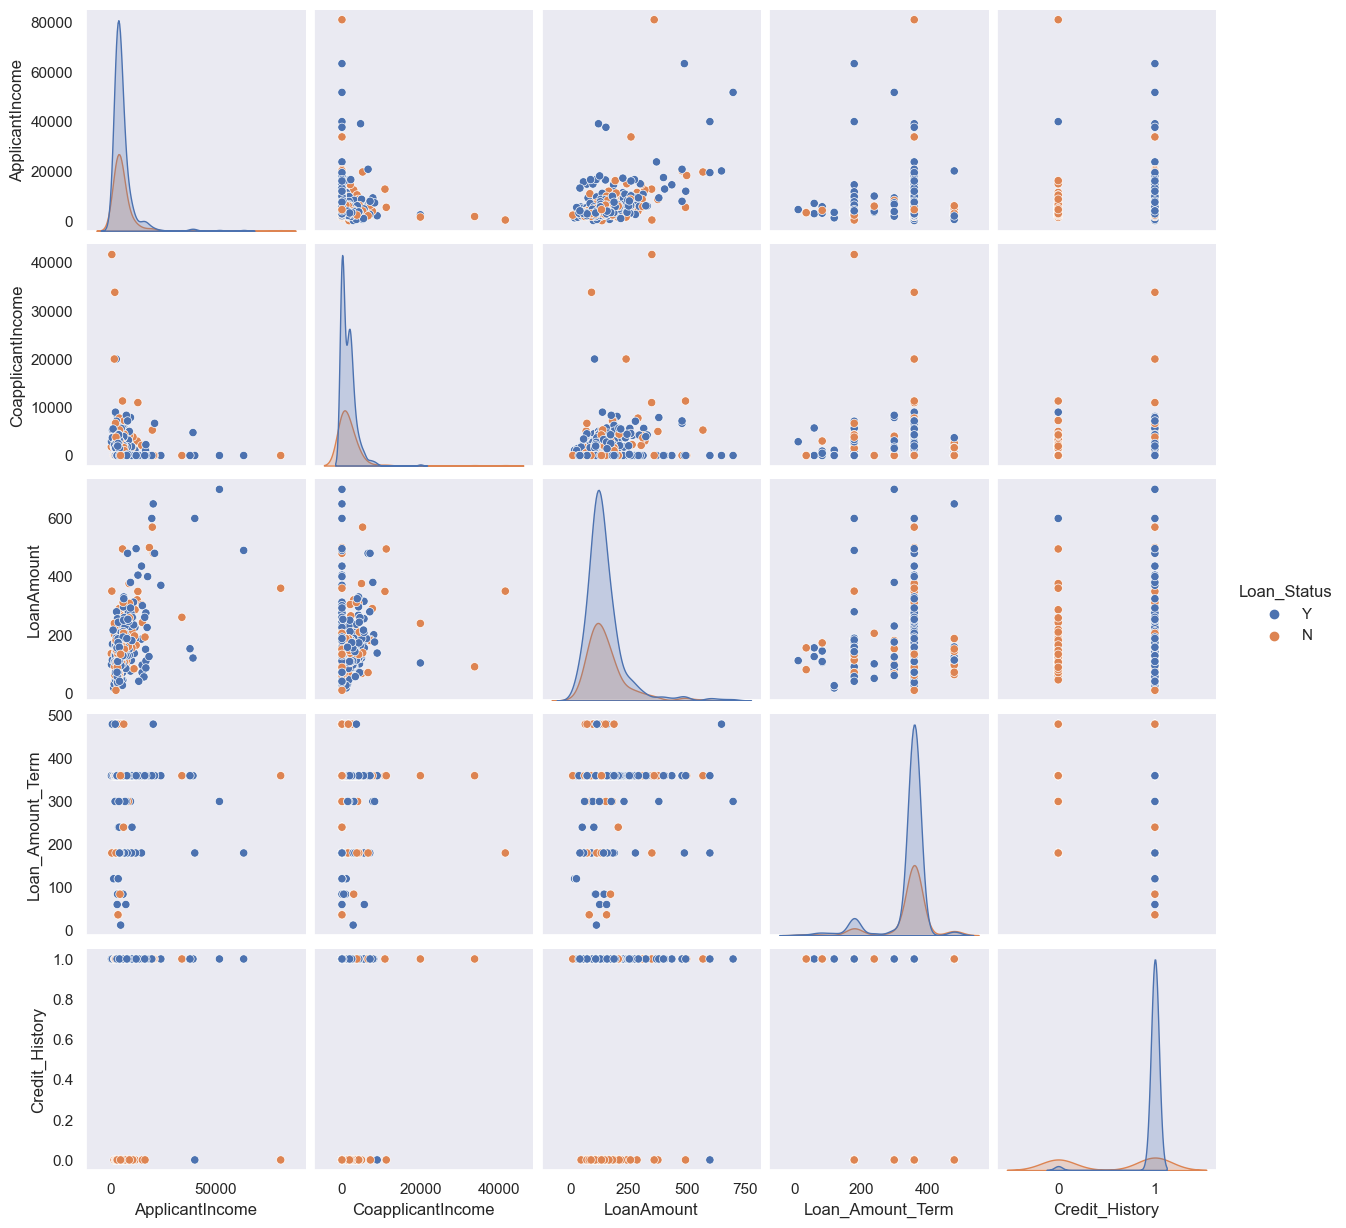

In [110]:
sns.pairplot(data,hue="Loan_Status")

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [112]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

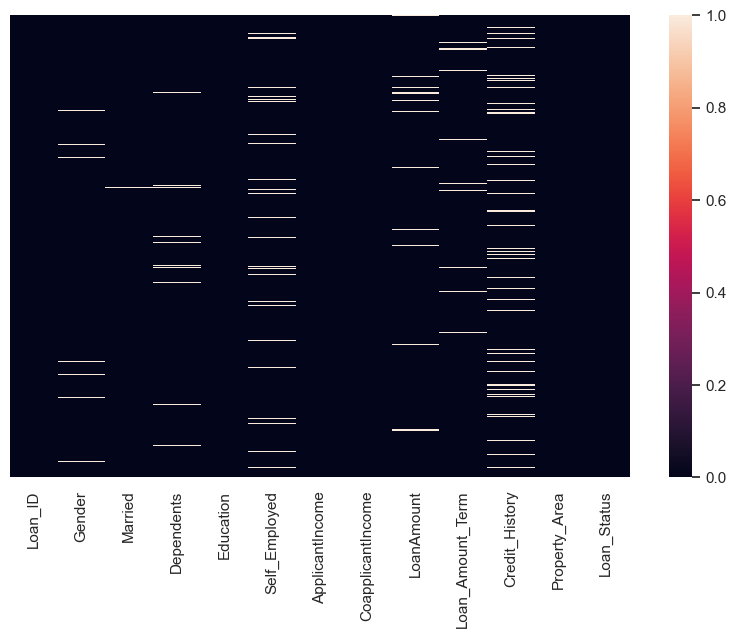

In [113]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [114]:
### Checking if the non-categorical variables are Normally Distributed or Not. i.e. Checking outliers...

print("Data distribution analysis:->---------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))



Data distribution analysis:->---------------------------------------


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  146.41216216216216

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [nan]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  nan

Standard Deviation:->

ApplicantIncome:  6104.064856533888
CoapplicantIncome:  2923.8644597700627
LoanAmount:  85.51500809120331


In [115]:
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()


### Not normaly distributed.



Prepare data for model training i.e. removing ouliers , filling null values , removing skewness

In [116]:
print(data["Gender"].value_counts())
print(data["Married"].value_counts())
print(data["Self_Employed"].value_counts())
print(data["Dependents"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Loan_Amount_Term"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

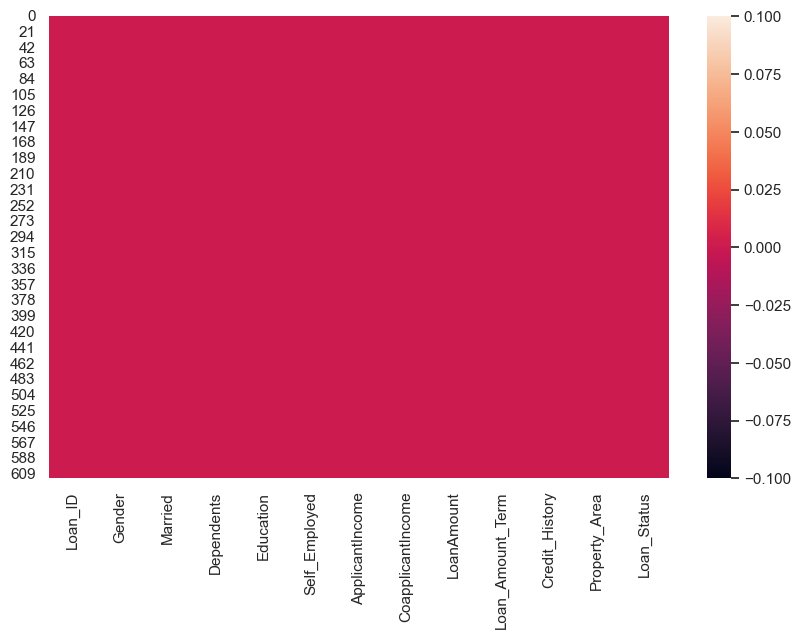

In [117]:
#Filling all Nan values with mode of respective variable
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
data["Dependents"] = data["Dependents"].replace('3+',int(3))
data["Dependents"] = data["Dependents"].replace('1',int(1))
data["Dependents"] = data["Dependents"].replace('2',int(2))
data["Dependents"] = data["Dependents"].replace('0',int(0))

data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

print(data.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [118]:
#Treating outliers and Converting data to Normal Distribution
#Before removing outlier

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))



Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  145.75244299674267

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [128.]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6104.064856533888
CoapplicantIncome:  2923.8644597700627
LoanAmount:  84.03871423798938


In [119]:
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()


In [120]:
####################################################################################################
#Getting log value :->

data["ApplicantIncome"] = np.log(data["ApplicantIncome"])
#As "CoapplicantIncome" columns has some "0" values we will get log values except "0"
data["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in data["CoapplicantIncome"]]
data["LoanAmount"] = np.log(data["LoanAmount"])
####################################################################################################


In [121]:
print("---------------------------After converting to Normal Distributed data----------------------")

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))



---------------------------After converting to Normal Distributed data----------------------

Mean:->

ApplicantIncome:  8.341213093227006
CoapplicantIncome:  4.289733227820409
LoanAmount:  4.857250194811088

Mode:->

ApplicantIncome:  [7.82404601]
CoapplicantIncome:  [0.]
LoanAmount:  [4.85203026]

Median:->

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:->

ApplicantIncome:  0.6447375297521025
CoapplicantIncome:  3.8725225987499146
LoanAmount:  0.49559166063018056


In [122]:
plt.figure(figsize=(10,4))
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

<Figure size 1000x400 with 0 Axes>


Now we can see that Bell Curve for all three variables and data is normally distributed now.

In [123]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.852030,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.318540,4.852030,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765569,4.787492,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,360.0,1.0,Urban,Y


In [124]:
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

#data = pd.get_dummies(data)
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


Feature Importance
In order to create best predictive model we need to best understand the available data and get most information from the data.

In multivariate data it is important to understand the iortance of varialbes and how much they are contributing towards the target variable. Such that we can remove unnecessary variables to increase model performance.

Many times dataset consists of exta columns which do not identically serve information to classify the data. This leads in Wrong Assumption of model while training.

To understand the importance of the data we are going to use Machine Learning classifiers and then will plot bar graph based on importance.

Also XGBoost has built-in Feature Importance Plotting tool which we are going to use.

Using more than one classifier will increase the confidence on our assumption of which variables to keep and which to remove.

In [125]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["Loan_Status","Loan_ID"],axis=1)
y = data["Loan_Status"]

Feature importance by XGBoost:->

Gender -> 0.032498196
Married -> 0.03846162
Dependents -> 0.042435512
Education -> 0.06297734
Self_Employed -> 0.04353366
ApplicantIncome -> 0.043603152
CoapplicantIncome -> 0.057352304
LoanAmount -> 0.045793608
Loan_Amount_Term -> 0.049817037
Credit_History -> 0.53902644
Property_Area -> 0.04450115


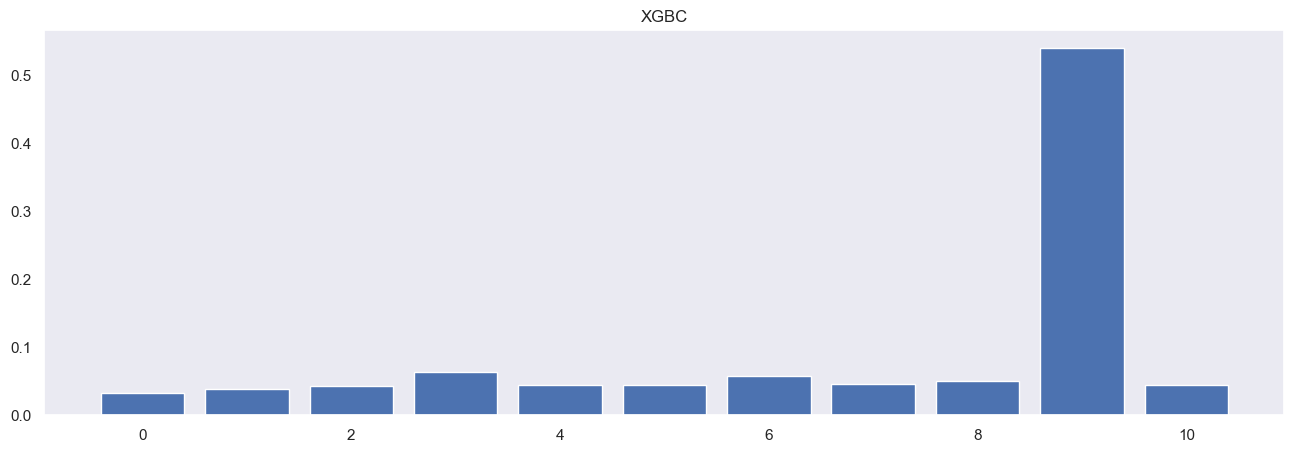

Feature importance by Random Forest:->

Gender -> 0.0170777515817467
Married -> 0.024929085290280466
Dependents -> 0.04872169512529252
Education -> 0.022686776722982187
Self_Employed -> 0.018334706556535317
ApplicantIncome -> 0.2069448299463533
CoapplicantIncome -> 0.1172926872106653
LoanAmount -> 0.18351970451810937
Loan_Amount_Term -> 0.04686451176282163
Credit_History -> 0.2695747970361632
Property_Area -> 0.04405345424904998


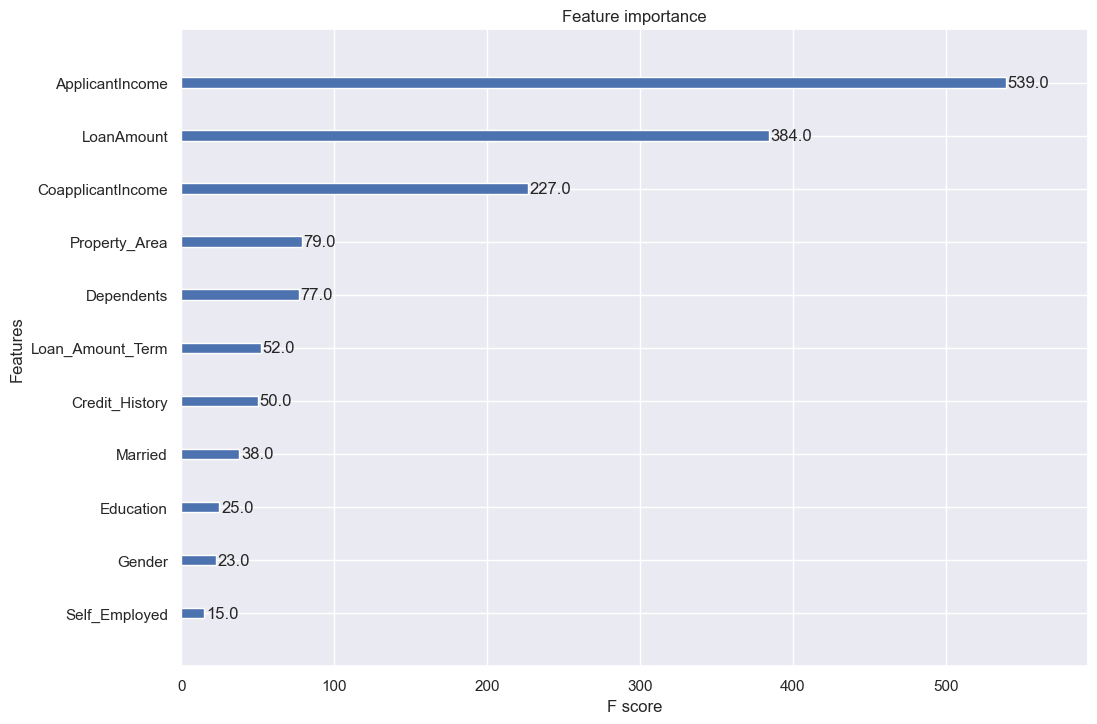

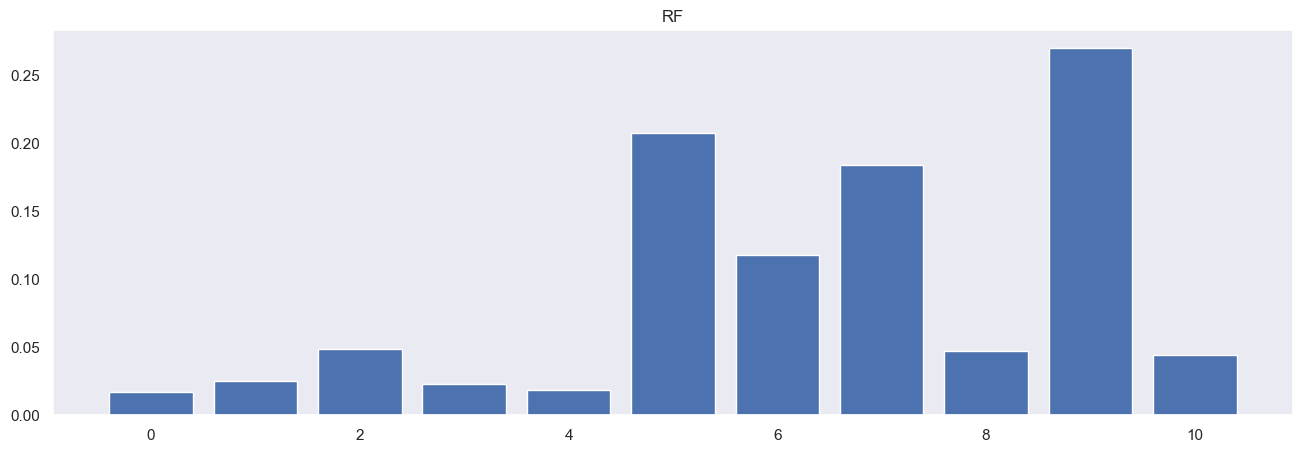

Feature importance by Decision Tree:->

Gender -> 0.007367501535896084
Married -> 0.022010089954276186
Dependents -> 0.06579464865413032
Education -> 0.024381365695030993
Self_Employed -> 0.030004457553702218
ApplicantIncome -> 0.24045827153790075
CoapplicantIncome -> 0.08826931907569732
LoanAmount -> 0.17185012360761012
Loan_Amount_Term -> 0.029430074970147605
Credit_History -> 0.29220086689201125
Property_Area -> 0.028233280523597186


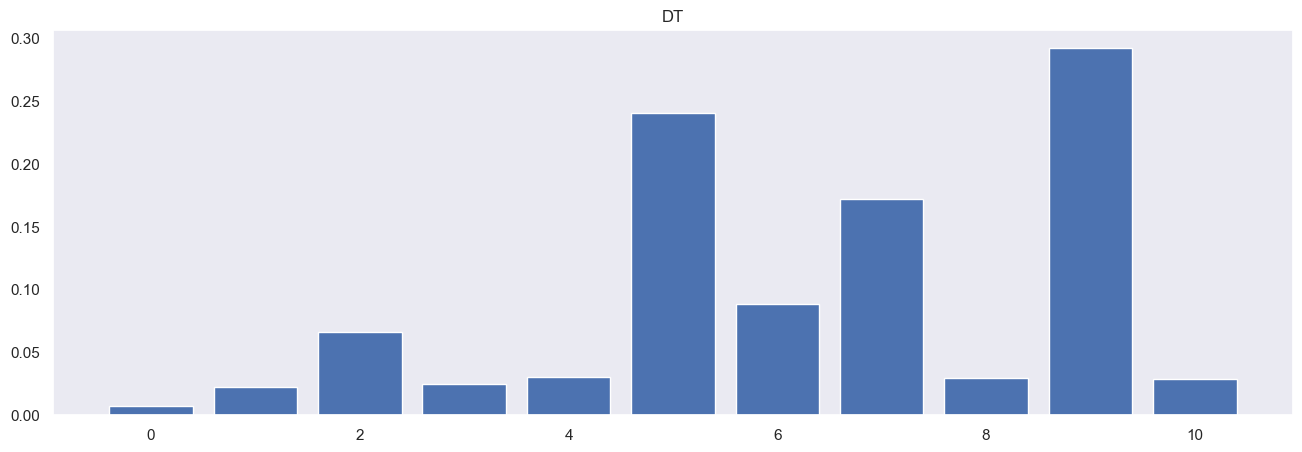

Feature importance by Suppoprt Vector Machine:->

Gender -> -0.011118064711792108
Married -> 0.016446275142516953
Dependents -> -0.00040107009190838965
Education -> -0.007861829798480713
Self_Employed -> -0.00445004539884053
ApplicantIncome -> 0.009519789949195001
CoapplicantIncome -> 0.0009463876354458326
LoanAmount -> -0.01279619269789034
Loan_Amount_Term -> 8.919517392769194e-05
Credit_History -> 2.081228877425726
Property_Area -> -0.0006494364958493813


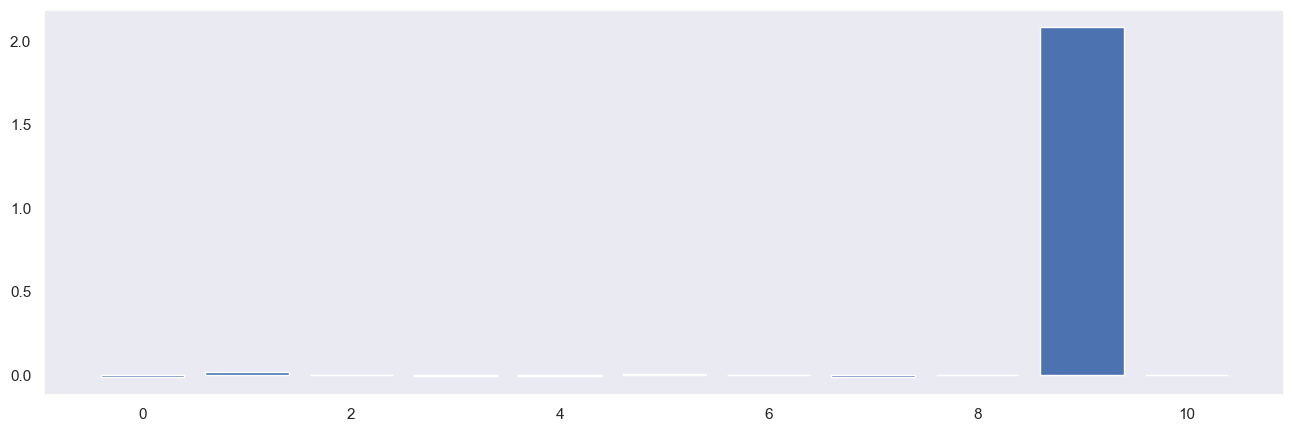

Feature importance by Logistic Regression:->

Gender -> -0.16259525618383394
Married -> 0.4354140127322402
Dependents -> 0.06179047321083716
Education -> -0.4153986935394136
Self_Employed -> 0.043680117193262605
ApplicantIncome -> 0.10193669848726605
CoapplicantIncome -> 0.04448432653458797
LoanAmount -> -0.5540541260207821
Loan_Amount_Term -> -0.0012184528238601319
Credit_History -> 3.2903645378711124
Property_Area -> 0.060646937970562635


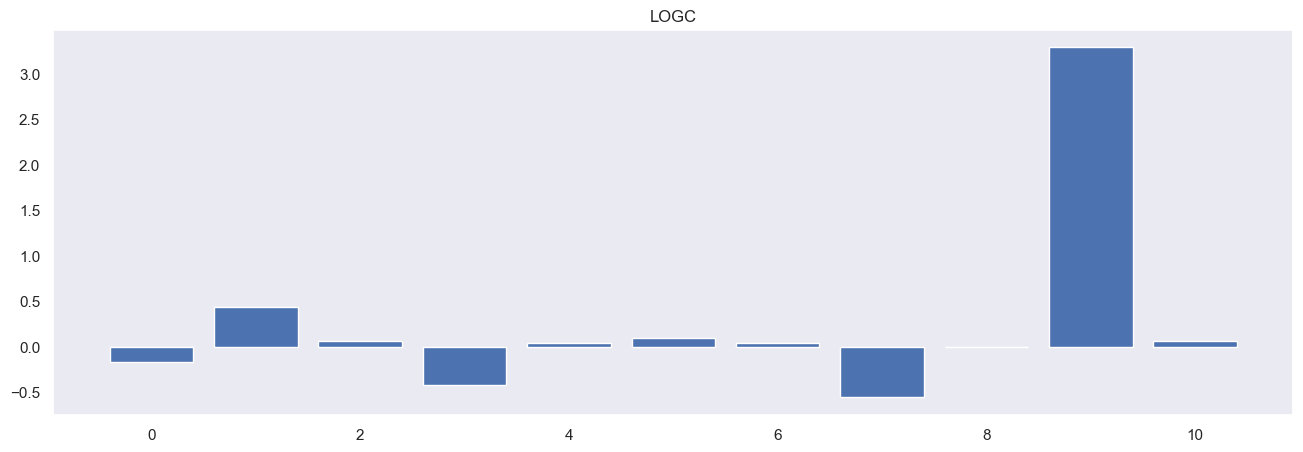

In [126]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

From feature importance => Credit History , ApplicantIncome , CoapplicantIncome, LoanAmount are the most important features

### Is data Balanced ?

<Axes: >

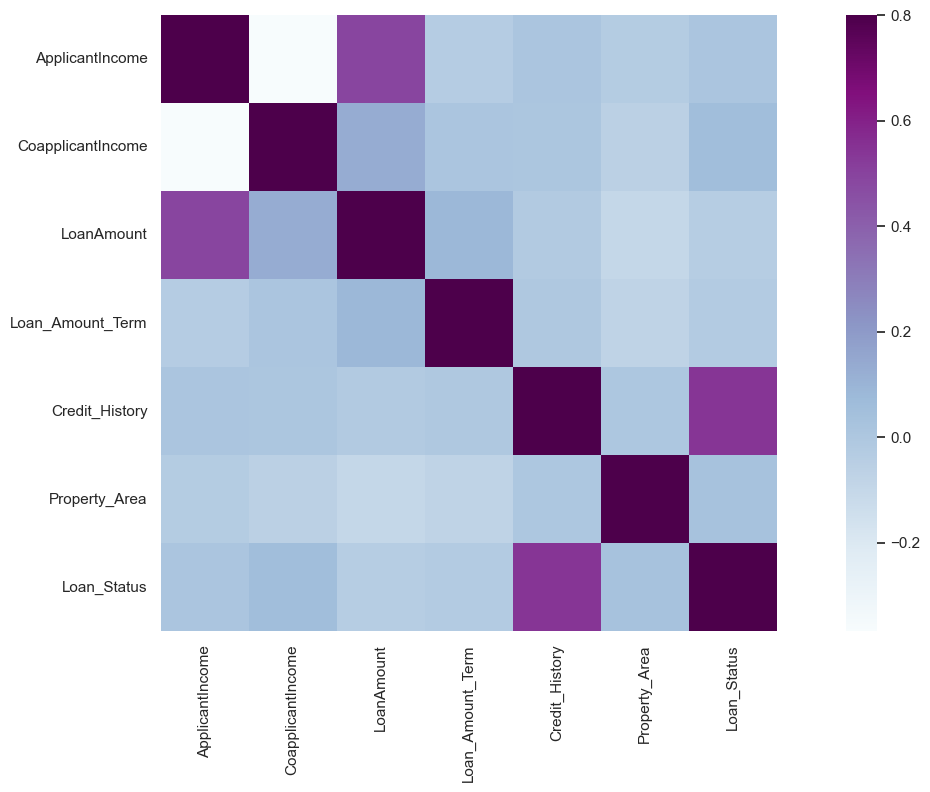

In [127]:
#Heat map of dataset with relative importance
matrix = data.drop(["Gender","Married","Dependents","Education","Self_Employed"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")


It seems Application income and Loan Amount is correlated , also Coapplication income correlated with Loan Aount then Credit history is corrleated with Loan Status

In [128]:
A = list(data.Loan_Status).count(1)
B = list(data.Loan_Status).count(0)
print("Count of 1<Approved>: ",A,"\nCount of 0<Rejected>: ",B)

fig = px.bar((A,B),x=["Approved","Rejected"],y=[A,B],color=[A,B])
fig.show()

Count of 1<Approved>:  422 
Count of 0<Rejected>:  192


It seems that data is highly Imbalanced.

When the target classes does not have equal count then the data is considered as imbalanced data.

From above graph it seems that dataset contains more records with Approved Loan_Status than Rejected Loan_Status. 422 over 192

If data would have maximum of 20-30 records difference that time this imabalnced would be ignorable.

Which will lead to make wrong assumptions by model and also model will be biased after training. We will overcome this issue by balancing the data.

To overcome this problem we will balance the data using Resampling technique with Upsample and Downsample.

In [129]:
#To keep original data as it is to use the same for later.
new_data = data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 1    192
0    192
Name: Loan_Status, dtype: int64
Upsampled data:->
 1    422
0    422
Name: Loan_Status, dtype: int64


Data Standardization / Normalization
Data normalization is required when the vriable values are in very distinct range.

For Ex. Suppose we have 2 columns "Age" and "Income"

Where value range of "Age" lying in 0-100 Approx. and value range of "Income" lying in 20,000 to 100,000

At this time model will perform poorly on testig data as all input values are not in same value range.

So not every time but whenever we get such type of data we need to normalized it i.e. Rescale it.

Widely used scaling tools are Min-Max Scaler and Standard-Scaler

Data Normalization is done by Min-Max Scaler which scales all th values between 0 to 1 range.

Data standardization is done by Standard-Scaler which scales the data so that Mean of observed data is 0 and Standard Deviation is 1.

As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that it will reduce more skewness and contribute in accuracy gain.

Experimental Modeling
In order to gain maximum posible accuracy one needs to conduct much emor experiments.

We will pass data on by one with different state i.e.

-Only Scaled data

-Scaled + Down Sampled Data

-Scaled + Up Sampled Data

-Scaled + Up Sampled Data + Selected feature with respective importance.

In [130]:
#Experiment 1: Only Scaled data with all variables

#X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data["Loan_Status"]
counter = Counter(y)
print("Counter: ",counter)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
  min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test),"\n")


KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

Counter:  Counter({1: 422, 0: 192})
After Standardization
Mean  -1.2357264969740873e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.47      0.80      0.59        25
           1       0.95      0.82      0.88       129

    accuracy                           0.82       154
   macro avg       0.71      0.81      0.74       154
weighted avg       0.88      0.82      0.84       154

Voting Ensemble:> 0.8181818181818182
              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:> 0.8311688311688312
              precision    recall  f1-score   support

           0       0.30      0.45      0.36        29
           1       0.86      0.76      0.81       125

    ac

In [131]:
#Experiment 2: Sclaed + Down Sampled Data

#X = df_downsampled.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_downsampled.Loan_Status
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False,)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

After Standardization
Mean  -3.064327691705293e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.56      0.71      0.63        38
           1       0.77      0.64      0.70        58

    accuracy                           0.67        96
   macro avg       0.67      0.67      0.66        96
weighted avg       0.69      0.67      0.67        96

Voting Ensemble:> 0.6666666666666666
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        20
           1       1.00      0.63      0.77        76

    accuracy                           0.71        96
   macro avg       0.71      0.82      0.68        96
weighted avg       0.88      0.71      0.74        96

SVM:> 0.7083333333333334
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        37
           1       0.71      0.58      0.64        59

    accuracy                           0.59

In [132]:
#Experiment 3: Sclaed + Up Sampled Data

#X = df_upsampled.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

844 844
After Standardization
Mean  7.143184188310644e-17 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        89
           1       0.87      0.74      0.80       122

    accuracy                           0.79       211
   macro avg       0.79      0.80      0.79       211
weighted avg       0.80      0.79      0.79       211

Voting Ensemble:> 0.7867298578199052
              precision    recall  f1-score   support

           0       0.38      0.95      0.54        43
           1       0.98      0.60      0.75       168

    accuracy                           0.67       211
   macro avg       0.68      0.78      0.64       211
weighted avg       0.86      0.67      0.70       211

SVM:> 0.6729857819905213
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        95
           1       0.78      0.69      0.73       116

    accuracy                        

In [133]:
# Experiment 4: Sclaed + Selected features with respective importance
#Droping features which are less important and keeping features as per importance analysis.
X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
#X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

614 614
After Standardization
Mean  -3.2669519263752433e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.49      0.70      0.58        30
           1       0.92      0.82      0.87       124

    accuracy                           0.80       154
   macro avg       0.70      0.76      0.72       154
weighted avg       0.84      0.80      0.81       154

Voting Ensemble:> 0.7987012987012987
              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:> 0.8311688311688312
              precision    recall  f1-score   support

           0       0.23      0.33      0.27        30
           1       0.82      0.73      0.77       124

    accuracy                      

In [136]:
# Tuning SVM parameters


X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

614 614
Best: 0.689468 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.689468 (0.016542) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.686215 (0.027277) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.682434 (0.009840) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.026685) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 0.01, 'gamma': '